**Seeding for reproducibility**

In [8]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [7]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Curation**

In [3]:
!ls

drive  sample_data


In [5]:
from zipfile import ZipFile  # ← Import this first

# Unzip the downloaded dataset from Google Drive
with ZipFile("/content/drive/MyDrive/plantvillage-dataset.zip.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/plantvillage")  # Optional: specify extraction folder


In [16]:
!ln -s /content/drive/MyDrive/plantvillage /content/plantvillage

print(os.listdir("plantvillage dataset"))
x="/content/plantvillage dataset/plantvillage dataset/segmented"
y="/content/plantvillage dataset/plantvillage dataset/color"
z="/content/plantvillage dataset/plantvillage dataset/grayscale"

print(len(os.listdir(x)))
print(os.listdir(x)[:5])

print(len(os.listdir(y)))
print(os.listdir(y)[:5])

print(len(os.listdir(z)))
print(os.listdir(z)[:5])

ln: failed to create symbolic link '/content/plantvillage': File exists
['plantvillage dataset', 'plantvillage']
38
['Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_mosaic_virus', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
38
['Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_mosaic_virus', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
38
['Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_mosaic_virus', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']


**Number of Classes = 38**

In [19]:

print(len(os.listdir("/content/plantvillage dataset/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/plantvillage dataset/plantvillage dataset/color/Grape___healthy")[:5])

423
['9ceba66a-d7b0-4ed4-98c3-37d361517a90___Mt.N.V_HL 6147.JPG', 'fce60e82-c31e-4040-ba92-8dde8410e93f___Mt.N.V_HL 8991.JPG', '578e5a2b-6f5b-4e30-b726-f8000c0136d7___Mt.N.V_HL 6129.JPG', 'f436f07c-ff87-4871-b712-5f282912f70c___Mt.N.V_HL 6180.JPG', '41506a32-a472-4ca3-a8e0-4980c179096b___Mt.N.V_HL 6206.JPG']


**Data Preprocessing**

In [20]:
# Dataset Path
base_dir = "/content/plantvillage dataset/plantvillage dataset/color"

(256, 256, 3)


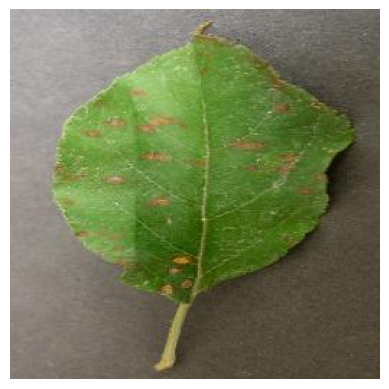

In [22]:
image_path = '/content/plantvillage dataset/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [23]:
image_path = '/content/plantvillage dataset/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [24]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [25]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [26]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [27]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [31]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.6059 - loss: 1.6223 - val_accuracy: 0.8395 - val_loss: 0.5106
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 137s 101ms/step - accuracy: 0.9233 - loss: 0.2468 - val_accuracy: 0.8716 - val_loss: 0.4179
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 76ms/step - accuracy: 0.9649 - loss: 0.1108 - val_accuracy: 0.8815 - val_loss: 0.4528
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - accuracy: 0.9793 - loss: 0.0636 - val_accuracy: 0.8849 - val_loss: 0.4613
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.8812 - val_loss: 0.5621


**Model Evaluation**

In [32]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8828 - loss: 0.5657
Validation Accuracy: 88.13%


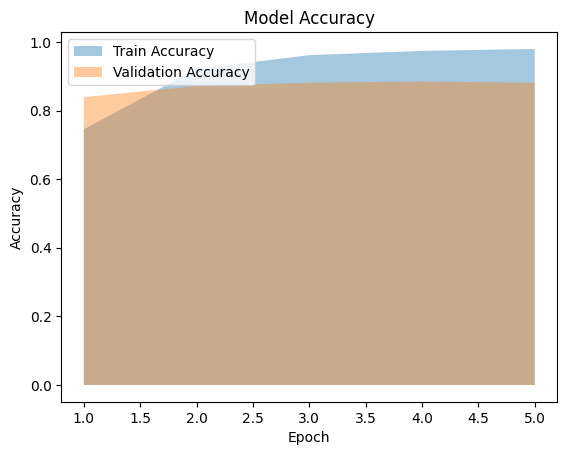

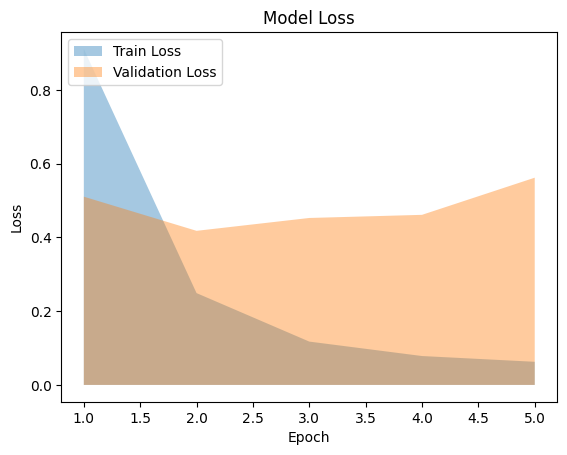

In [41]:
# Area graph for Accuracy
epochs = range(1, len(history.history['accuracy']) + 1)

plt.fill_between(epochs, history.history['accuracy'], alpha=0.4, label='Train Accuracy')
plt.fill_between(epochs, history.history['val_accuracy'], alpha=0.4, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Area graph for Loss
plt.fill_between(epochs, history.history['loss'], alpha=0.4, label='Train Loss')
plt.fill_between(epochs, history.history['val_loss'], alpha=0.4, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


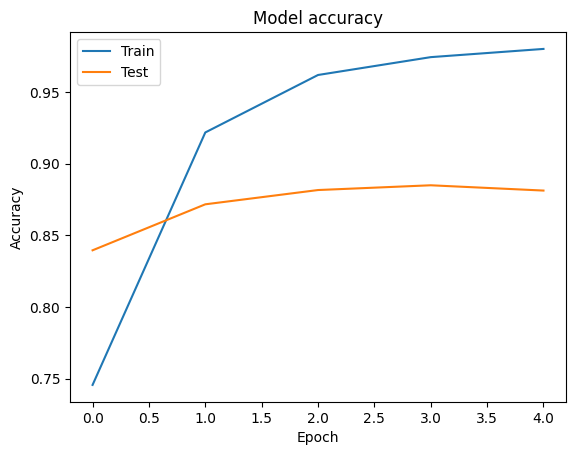

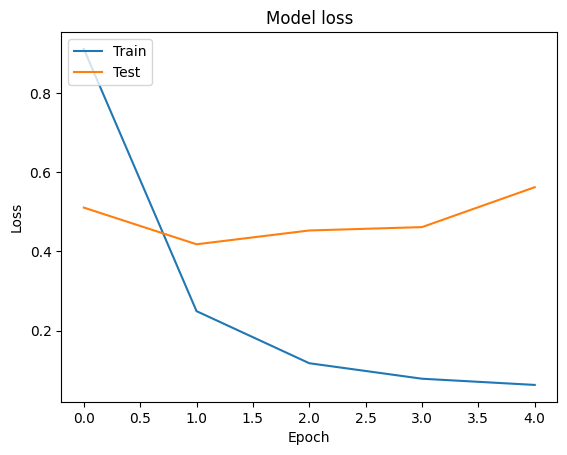

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [34]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [35]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [36]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [37]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [39]:
# Example Usage
image_path = '/content/plantvillage dataset/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class Name: Apple___Black_rot


**Save the model to Google drive or local**

In [40]:
model.save('drive/MyDrive/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
